In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [77]:
df=pd.read_csv("diabetes.csv")

In [78]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [79]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [80]:
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

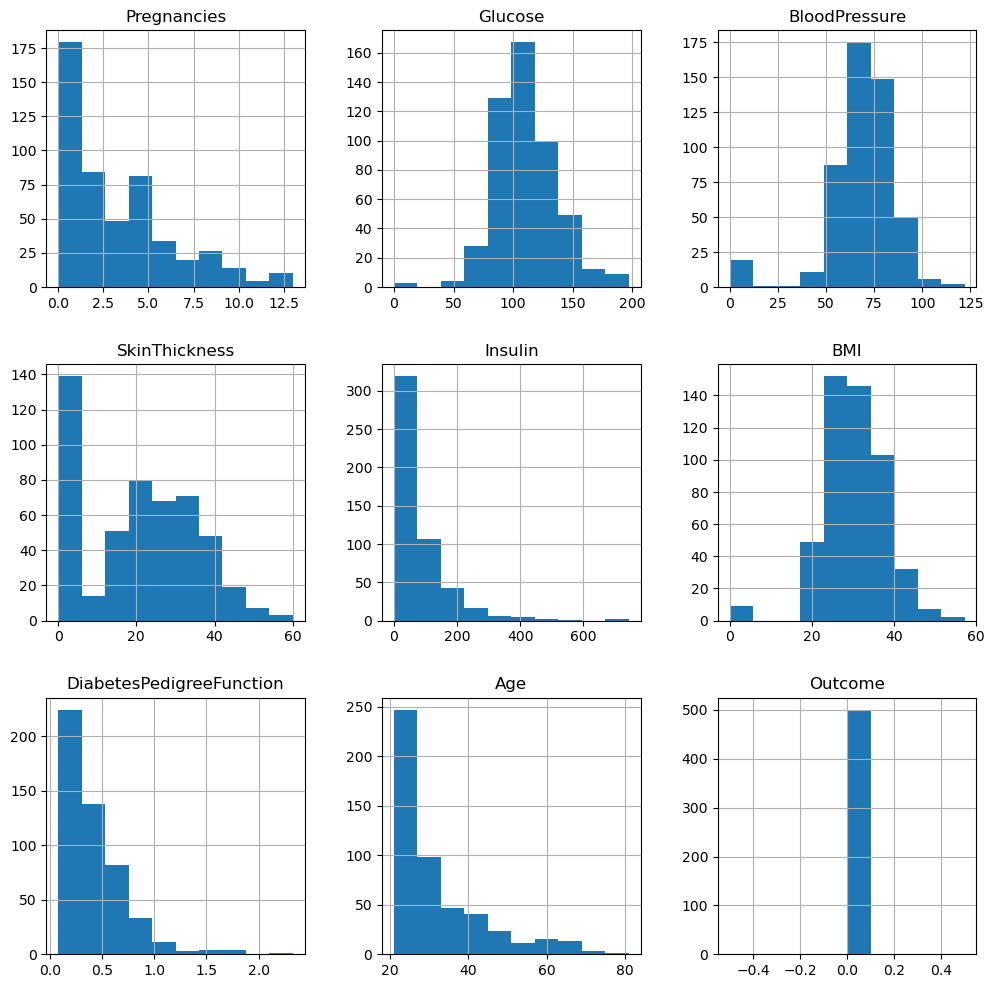

In [81]:
hist1=df[df['Outcome']==0].hist(figsize=(12,12))

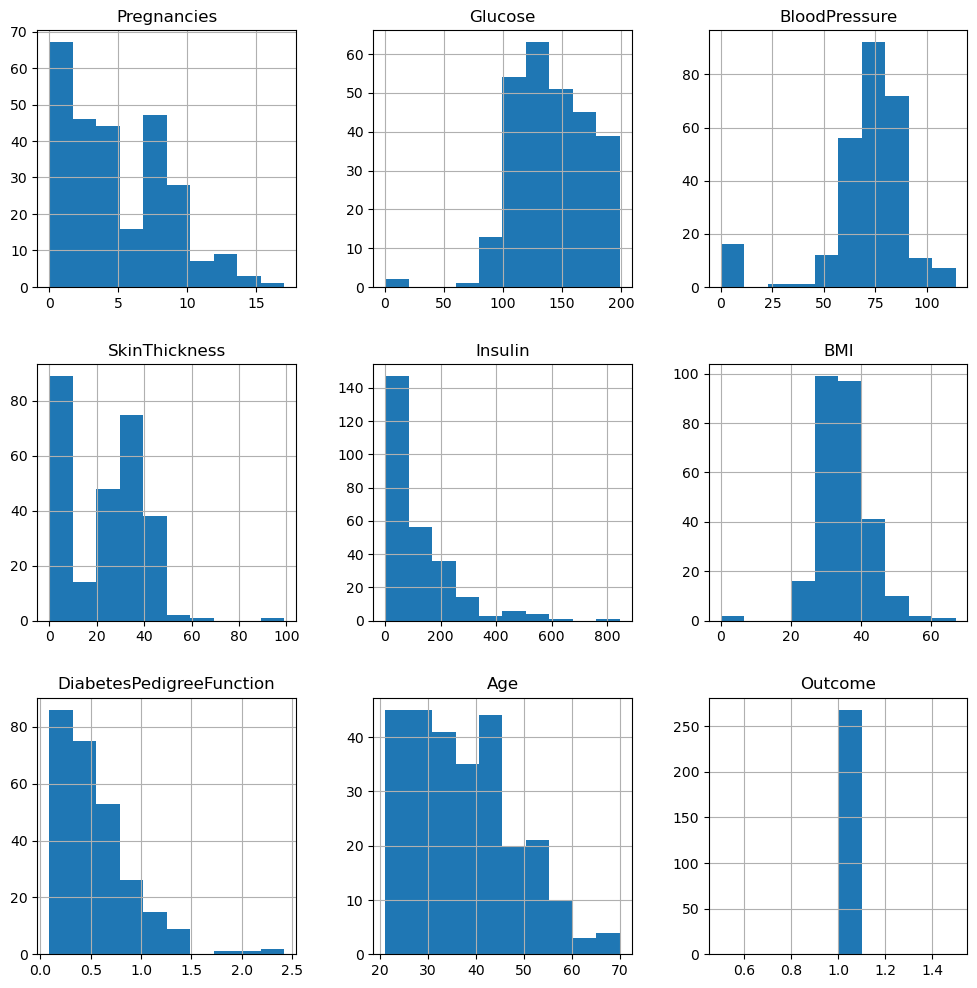

In [82]:
hist1=df[df['Outcome']==1].hist(figsize=(12,12))

# Before Preprocessing

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
# Separate features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, target_names, title='Confusion Matrix', figsize=(5, 3)):
   
    cm = confusion_matrix(y_true, y_pred)
    
    
    cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)
    
   
    plt.figure(figsize=figsize)
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Accuracy: 0.7327586206896551
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        76
           1       0.62      0.60      0.61        40

    accuracy                           0.73       116
   macro avg       0.70      0.70      0.70       116
weighted avg       0.73      0.73      0.73       116



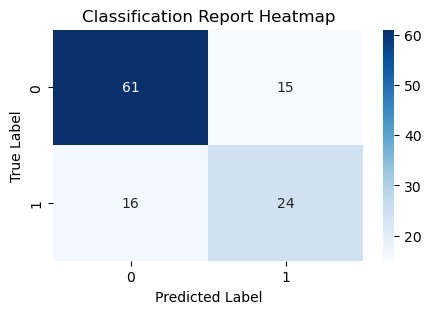

In [85]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initializing SVM classifier
svm_classifier = SVC(kernel='linear')

# Training the SVM classifier
svm_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = svm_classifier.predict(X_test)
target_names=[0,1]
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, target_names, title='Classification Report Heatmap', figsize=(5,3))

Accuracy: 0.8017241379310345
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        76
           1       0.74      0.65      0.69        40

    accuracy                           0.80       116
   macro avg       0.79      0.77      0.77       116
weighted avg       0.80      0.80      0.80       116



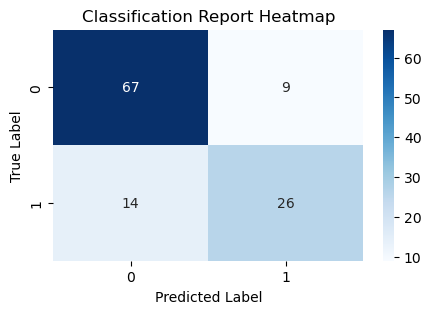

In [86]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=13)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, target_names, title='Classification Report Heatmap', figsize=(5,3))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        76
           1       0.63      0.65      0.64        40

    accuracy                           0.75       116
   macro avg       0.72      0.73      0.72       116
weighted avg       0.75      0.75      0.75       116



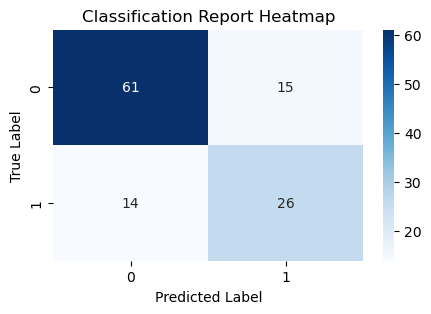

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, target_names, title='Classification Report Heatmap', figsize=(5,3))

Epoch 1/50
17/17 [==============================] - 1s 14ms/step - loss: 0.6667 - accuracy: 0.6238 - val_loss: 0.5884 - val_accuracy: 0.7176
Epoch 2/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5652 - accuracy: 0.7447 - val_loss: 0.5357 - val_accuracy: 0.7252
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.5203 - accuracy: 0.7678 - val_loss: 0.5080 - val_accuracy: 0.7176
Epoch 4/50
17/17 [==============================] - 0s 5ms/step - loss: 0.4973 - accuracy: 0.7716 - val_loss: 0.4912 - val_accuracy: 0.6947
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.4794 - accuracy: 0.7754 - val_loss: 0.4860 - val_accuracy: 0.7176
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.4691 - accuracy: 0.7965 - val_loss: 0.4768 - val_accuracy: 0.7328
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.4643 - accuracy: 0.7985 - val_loss: 0.4809 - val_accuracy: 0.7328
Epoch 8/50
17/17 [=

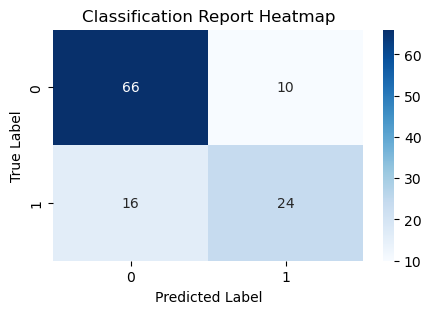

In [88]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the number of classes
num_classes = 2

# Define the model architecture
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test set
loss, accuracy = dnn_model.evaluate(X_test, y_test)
print("DNN Loss:", loss)
print("DNN Accuracy:", accuracy)

# Get probabilities of each class
y_pred_probs = dnn_model.predict(X_test)
# Convert probabilities to class labels
y_pred_dnn = np.argmax(y_pred_probs, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dnn))
plot_confusion_matrix(y_test, y_pred_dnn, target_names, title='Classification Report Heatmap', figsize=(5,3))

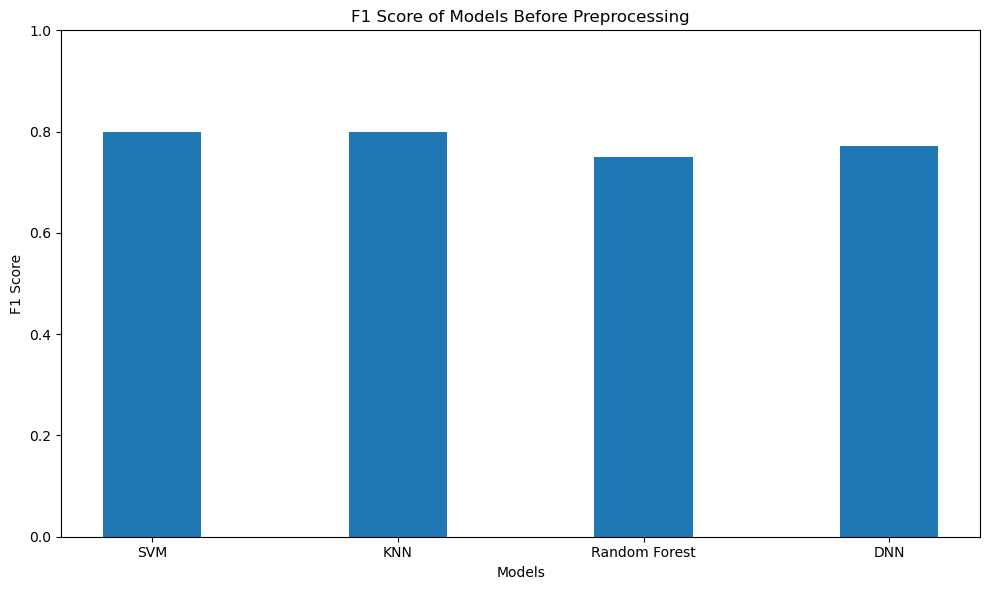

In [91]:
import matplotlib.pyplot as plt

# F1 score of models before preprocessing
f1_scores_before = {
    'SVM': f1_score(y_test, y_pred, average='weighted'),
    'KNN': f1_score(y_test, y_pred, average='weighted'),
    'Random Forest': f1_score(y_test, y_pred_rf, average='weighted'),
    'DNN': f1_score(y_test, y_pred_dnn, average='weighted')
}

# Plotting the bar graph for F1 scores before preprocessing
models_before = list(f1_scores_before.keys())
f1_scores_before = list(f1_scores_before.values())

x = range(len(models_before))

plt.figure(figsize=(10, 6))

plt.bar(x, f1_scores_before, width=0.4)

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of Models Before Preprocessing')
plt.xticks(x, models_before)
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1 for F1 score
plt.tight_layout()
plt.show()


# After Preprocessing

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN

In [51]:
selected=["Glucose","SkinThickness","Insulin","BMI","BloodPressure"]

for col in selected:
    df[col]= df[col].apply(lambda x: np.nan if x==0 else x)
    
for col in selected:
    df[col]=df[col].fillna(df.groupby("Outcome")[col].transform("mean"))

In [52]:
num_cols=[col for col in df.columns if (df[col].dtype != "O") & (col != "Outcome") & (df[col].nunique()>10)]
def outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# with these up and low values , we are gonna look at the variables if there is a outlier or not 
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
def remove_outliers(dataframe, columns):
    for col in columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        # Remove outliers
        dataframe = dataframe[(dataframe[col] >= low_limit) & (dataframe[col] <= up_limit)]
    return dataframe

for col in num_cols:
    print(col, check_outlier(df, col))
df_cleaned = remove_outliers(df, num_cols)
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

Pregnancies False
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age False
Shape before removing outliers: (768, 9)
Shape after removing outliers: (736, 9)


In [53]:
df=df_cleaned

In [54]:
# Separate features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

adasyn = ADASYN()
X_res, y_res = adasyn.fit_resample(X_train, y_train)

In [55]:
# Define hyperparameters for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)



Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        73
           1       0.82      0.84      0.83        38

    accuracy                           0.88       111
   macro avg       0.87      0.87      0.87       111
weighted avg       0.88      0.88      0.88       111



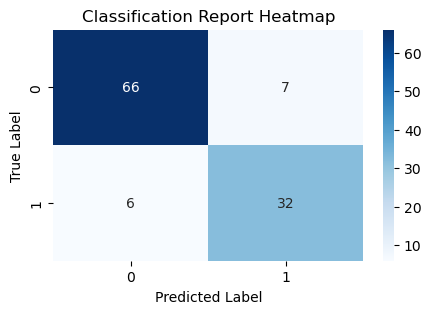

In [56]:
# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, target_names, title='Classification Report Heatmap', figsize=(5,3))

In [57]:
y_train.shape

(625,)

In [58]:
y_test.shape

(111,)

In [59]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model is:', accuracy * 100)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the model is: 90.990990990991
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        73
           1       0.85      0.89      0.87        38

    accuracy                           0.91       111
   macro avg       0.90      0.91      0.90       111
weighted avg       0.91      0.91      0.91       111



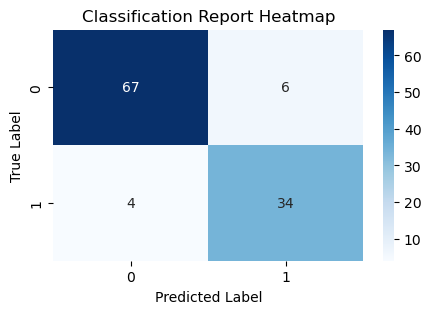

In [60]:
plot_confusion_matrix(y_test, y_pred, target_names, title='Classification Report Heatmap', figsize=(5,3))

In [61]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import Pipeline

# Define a function to create the model
def create_model(hidden_layer_size=128, dropout_rate=0.2):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hidden_layer_size, activation='relu', input_shape=(8,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(hidden_layer_size//2, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create a pipeline with StandardScaler and the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model))
])

# Define the parameter grid
param_grid = {
    'clf__hidden_layer_size': [64, 128, 256],
    'clf__dropout_rate': [0.2, 0.3, 0.4],
    'clf__epochs': [50],
    'clf__batch_size': [32]
}

# Define F1 scorer for GridSearchCV
f1_scorer = make_scorer(accuracy_score, average='weighted')

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring=f1_scorer, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best F1 score
print("Best parameters found:", grid_search.best_params_)
print("Best F1 score on validation set:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, test_pred, average='weighted')
print("F1 score on test set:", test_f1)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Epoch 1/50


C:\Users\shaks\AppData\Local\Temp\ipykernel_15388\3172409149.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('clf', tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model))


13/13 [==============================] - 1s 2ms/step - loss: 0.8864 - accuracy: 0.6274
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.7139
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.5928 - accuracy: 0.7308
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5135 - accuracy: 0.7644
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4895 - accuracy: 0.8029
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8173
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4249 - accuracy: 0.8389
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8462
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8269
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8413
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 1ms/step - loss: 1.1275 - accuracy: 0.3477
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8635 - accuracy: 0.6667
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7084 - accuracy: 0.7362
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5852 - accuracy: 0.7842
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5222 - accuracy: 0.8297
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.8129
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.8177
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.8465
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8561
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8225
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 1ms/step - loss: 1.0978 - accuracy: 0.4221
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8718 - accuracy: 0.6859
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7184 - accuracy: 0.7506
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5995 - accuracy: 0.7746
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7770
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5107 - accuracy: 0.7986
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4973 - accuracy: 0.7794
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.7818
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.8010
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4675 - accuracy: 0.8153
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

13/13 [==============================] - 1s 1ms/step - loss: 1.1247 - accuracy: 0.3582
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.7351 - accuracy: 0.7957
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5326 - accuracy: 0.8317
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8341
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4071 - accuracy: 0.8293
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3878 - accuracy: 0.8365
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3779 - accuracy: 0.8606
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3652 - accuracy: 0.8606
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3448 - accuracy: 0.8678
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8582
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 0.8686 - accuracy: 0.6787
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.7986
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.8177
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8513
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8345
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8465
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8441
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3565 - accuracy: 0.8369
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8561
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3609 - accuracy: 0.8489
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 1ms/step - loss: 0.9571 - accuracy: 0.5707
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.7554
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4891 - accuracy: 0.7938
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8129
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8297
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8441
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8657
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.8537
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3800 - accuracy: 0.8609
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8585
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

13/13 [==============================] - 1s 2ms/step - loss: 0.7639 - accuracy: 0.7067
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.8438
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8510
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3568 - accuracy: 0.8486
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8654
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8630
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8558
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8702
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.8606
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.2946 - accuracy: 0.8822
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 0.7973 - accuracy: 0.7074
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8369
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.8441
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8489
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3676 - accuracy: 0.8441
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8561
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8633
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8585
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3158 - accuracy: 0.8705
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8681
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 0.7974 - accuracy: 0.6619
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.8010
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 0.4269 - accuracy: 0.8106
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8417
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8537
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8609
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3822 - accuracy: 0.8489
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3776 - accuracy: 0.8465
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8585
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8633
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

13/13 [==============================] - 1s 1ms/step - loss: 1.1027 - accuracy: 0.4375
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.8811 - accuracy: 0.6683
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.7648 - accuracy: 0.6875
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6455 - accuracy: 0.7332
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.7596
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5373 - accuracy: 0.7788
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4775 - accuracy: 0.8269
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.8173
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4347 - accuracy: 0.8221
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8149
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 1.0312 - accuracy: 0.5012
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8003 - accuracy: 0.7074
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6775 - accuracy: 0.7482
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.7626
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5582 - accuracy: 0.7746
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.8129
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7890
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4550 - accuracy: 0.8321
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.8297
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4486 - accuracy: 0.8129
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 1.1511 - accuracy: 0.3741
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.9246 - accuracy: 0.5803
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8123 - accuracy: 0.6763
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7191 - accuracy: 0.6978
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6501 - accuracy: 0.7530
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.7602
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7506
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.7794
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5227 - accuracy: 0.7866
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.8201
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

13/13 [==============================] - 1s 2ms/step - loss: 1.0140 - accuracy: 0.5144
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.7428
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7644
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.8293
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8101
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.8413
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.8341
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3548 - accuracy: 0.8486
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8413
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3726 - accuracy: 0.8245
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 1.0567 - accuracy: 0.4676
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.7626
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.8129
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.8369
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8153
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4144 - accuracy: 0.8441
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8321
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3824 - accuracy: 0.8633
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3934 - accuracy: 0.8321
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.8489
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 0.9193 - accuracy: 0.5875
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6525 - accuracy: 0.7482
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5135 - accuracy: 0.7890
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7890
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.7986
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8082
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4327 - accuracy: 0.8321
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8249
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8249
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8465
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

13/13 [==============================] - 1s 2ms/step - loss: 0.7824 - accuracy: 0.6947
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.8293
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4052 - accuracy: 0.8438
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.8462
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3791 - accuracy: 0.8510
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8630
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8750
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8654
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8558
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8702
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 0.7595 - accuracy: 0.6787
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.8082
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4059 - accuracy: 0.8489
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8393
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8537
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.8441
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8657
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8369
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8585
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8561
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 0.8143 - accuracy: 0.6547
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7842
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8129
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8249
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 0.4189 - accuracy: 0.8297
Epoch 6/50
14/14 [==============================] - 0s 3ms/step - loss: 0.4025 - accuracy: 0.8489
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8585
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8561
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8369
Epoch 10/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.8489
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

13/13 [==============================] - 1s 1ms/step - loss: 1.0478 - accuracy: 0.4303
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.8319 - accuracy: 0.6587
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.7551 - accuracy: 0.6803
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.7308
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.7476
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.7812
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.7981
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.8149
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5217 - accuracy: 0.7716
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.8053
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 1ms/step - loss: 1.1007 - accuracy: 0.3789
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8390 - accuracy: 0.6259
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7297 - accuracy: 0.6811
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6707 - accuracy: 0.7554
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.7218
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5551 - accuracy: 0.7602
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5182 - accuracy: 0.7962
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5270 - accuracy: 0.7626
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7914
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4580 - accuracy: 0.7986
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 1ms/step - loss: 1.0665 - accuracy: 0.4508
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8313 - accuracy: 0.6787
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7325 - accuracy: 0.6811
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6393 - accuracy: 0.7506
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6117 - accuracy: 0.7674
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5585 - accuracy: 0.7554
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5023 - accuracy: 0.7818
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.7578
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7866
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4977 - accuracy: 0.7962
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

13/13 [==============================] - 1s 2ms/step - loss: 0.8724 - accuracy: 0.6635
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6084 - accuracy: 0.7933
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7957
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4594 - accuracy: 0.8221
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8293
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8317
Epoch 7/50
13/13 [==============================] - 0s 3ms/step - loss: 0.4010 - accuracy: 0.8269
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.8389
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8438
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8413
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 0.9063 - accuracy: 0.6187
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.7818
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5244 - accuracy: 0.8082
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.8321
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4463 - accuracy: 0.8249
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8201
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.8153
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8345
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8345
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8369
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 0.9951 - accuracy: 0.4916
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.7026
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.7698
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5003 - accuracy: 0.7650
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7794
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.8058
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.8058
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8225
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8417
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8058
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

13/13 [==============================] - 1s 2ms/step - loss: 0.8980 - accuracy: 0.5697
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7981
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.8341
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 0.8221
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3783 - accuracy: 0.8365
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8606
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8558
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8654
Epoch 9/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8582
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8582
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 0.8550 - accuracy: 0.5899
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4895 - accuracy: 0.8082
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8345
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8345
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8537
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8465
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8369
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8465
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8513
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8585
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

14/14 [==============================] - 1s 2ms/step - loss: 0.8057 - accuracy: 0.6571
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7722
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8058
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.7986
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8201
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8106
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8225
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8489
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8441
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8369
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
           ^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 175, in wrapper
    params = func_sig.bind(*args, **kwargs)
    

20/20 [==============================] - 1s 1ms/step - loss: 1.0299 - accuracy: 0.4944
Epoch 2/50
20/20 [==============================] - 0s 1ms/step - loss: 0.7325 - accuracy: 0.7424
Epoch 3/50
20/20 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7920
Epoch 4/50
20/20 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.8256
Epoch 5/50
20/20 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8400
Epoch 6/50
20/20 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8496
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.8480
Epoch 8/50
20/20 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8400
Epoch 9/50
20/20 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8480
Epoch 10/50
20/20 [==============================] - 0s 1ms/step - loss: 0.3924 - accuracy: 0.8544
Epoch 11/50
20/20 [===========

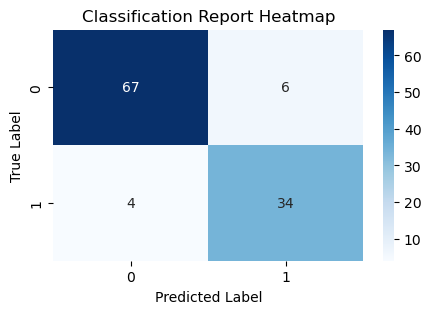

In [62]:
plot_confusion_matrix(y_test, y_pred, target_names, title='Classification Report Heatmap', figsize=(5,3))

In [63]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'clf__batch_size': 32, 'clf__dropout_rate': 0.2, 'clf__epochs': 50, 'clf__hidden_layer_size': 64}


In [64]:
print("Classification Report:")
print(classification_report(y_test, test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        73
           1       0.84      0.82      0.83        38

    accuracy                           0.88       111
   macro avg       0.87      0.87      0.87       111
weighted avg       0.88      0.88      0.88       111



In [65]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


def create_dnn_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

dnn_model = create_dnn_model()
dnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


rf_pred_train = rf_model.predict(X_train)
dnn_pred_train = dnn_model.predict(X_train)

rf_pred_test = rf_model.predict(X_test)
dnn_pred_test = dnn_model.predict(X_test)


X_train_stacked = np.column_stack((rf_pred_train, dnn_pred_train))
X_test_stacked = np.column_stack((rf_pred_test, dnn_pred_test))


scorer = make_scorer(f1_score)


def create_meta_learner(hidden_units=32, dropout_rate=0.2):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_shape=(2,)),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the meta-learner model
meta_learner = KerasClassifier(build_fn=create_meta_learner, verbose=0)

# Define the parameter grid for the meta-learner model
param_grid = {
    'hidden_units': [16, 32, 64],
    'dropout_rate': [0.1, 0.2, 0.3],
    'epochs': [5, 10, 15],
    'batch_size': [16, 32, 64]
}

# Perform grid search
grid_search = GridSearchCV(estimator=meta_learner, param_grid=param_grid, scoring=scorer, cv=3)
grid_result = grid_search.fit(X_train_stacked, y_train)

# Print the best parameters and the corresponding F1 score
print("Best Parameters:", grid_result.best_params_)
print("Best F1 Score:", grid_result.best_score_)


4/4 [==============================] - 0s 2ms/step


C:\Users\shaks\AppData\Local\Temp\ipykernel_15388\3204488617.py:53: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  meta_learner = KerasClassifier(build_fn=create_meta_learner, verbose=0)


7/7 [==============================] - 0s 759us/step


7/7 [==============================] - 0s 839us/step
Best Parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'epochs': 5, 'hidden_units': 32}
Best F1 Score: 1.0


In [66]:
best_meta_learner = grid_search.best_estimator_

ensemble_pred_test = best_meta_learner.predict(X_test_stacked)

# Print confusion matrix
conf_matrix = classification_report(y_test, ensemble_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

4/4 [==============================] - 0s 1ms/step
Confusion Matrix:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        73
           1       0.82      0.87      0.85        38

    accuracy                           0.89       111
   macro avg       0.88      0.89      0.88       111
weighted avg       0.89      0.89      0.89       111



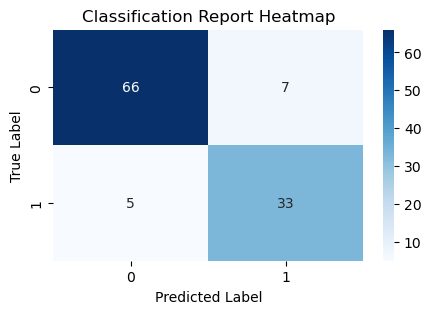

In [67]:
plot_confusion_matrix(y_test, ensemble_pred_test, target_names, title='Classification Report Heatmap', figsize=(5,3))

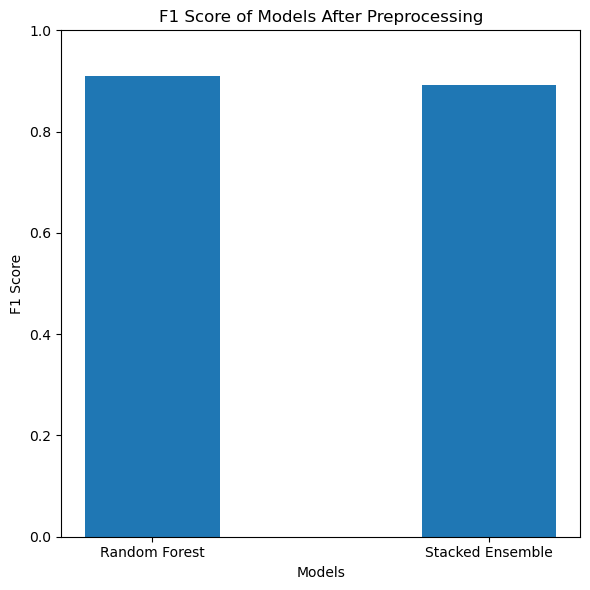

In [75]:
import matplotlib.pyplot as plt

# F1 score of models after preprocessing
f1_scores_after = {
    'Random Forest': f1_score(y_test, y_pred, average='weighted'),
    'Stacked Ensemble': f1_score(y_test, ensemble_pred_test, average='weighted')
}

# Plotting the bar graph for F1 scores after preprocessing
models_after = list(f1_scores_after.keys())
f1_scores_after = list(f1_scores_after.values())

x = range(len(models_after))

plt.figure(figsize=(6, 6))

plt.bar(x, f1_scores_after, width=0.4)

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of Models After Preprocessing')
plt.xticks(x, models_after)
plt.ylim(0, 1)  # Setting y-axis limit from 0 to 1 for F1 score
plt.tight_layout()
plt.show()
